# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

In [2]:
# Para fijar la semilla aleatoria
from sklearn.pipeline import make_pipeline

# Para normalizar
from sklearn.preprocessing import StandardScaler

# Para predecir la variable objetivo, mediante modelos lineales de clasificación
from sklearn.linear_model import SGDClassifier

# Métricas: Para evaluar los conjuntos de datos (Train y Test)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

# Para ver la grilla
from sklearn.model_selection import (ParameterGrid, GridSearchCV)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
dataset = pd.read_csv(r"C:\Users\luqqa\OneDrive\Escritorio\DiploDatos\IntroduccionAprendizajeAutomatico-master\Lab 2\loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

In [4]:
dataset[:5]

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106


**RESPUESTAS:**     

**1.1** El conjunto de datos **HMEQ** pertenece a datos relevados por el departamento de créditos de un banco. Contiene información sobre el rendimiento de 1.854 préstamos. El objetivo de este dataset es el de poder automatizar el proceso de selección de usuarios candidatos al crédito de viviendas.  

**1.2** Nuestra variable objetivo es **TARGET**. Es una variable binaria que indica si se cumple o nó con el préstamo (**1**= No se pagó el crédito; **0**= Se pagó el credito)

**1.3** El dataset cuenta con 10 atributos:    
* **1-LOAN:** Cantidad de dinero requerido en el préstamo.
* **2-MORTDUE:** Suma adeudada en la hipoteca existente.
* **3-VALUE:** Valor de la propiedad actual.
* **4-YOJ:** Años en el trabajo actual.
* **5-DEROG:** Número de informes negativos importantes.
* **6-DELINQ:** Número de líneas de crédito en mora.
* **7-CLAGE:** Edad de la línea comercial más antigua en meses.
* **8-NINQ:** Número de líneas de crédito recientes.
* **9-CLNO:** Número de líneas de crédito.
* **10-DEBTINC:** Relación Deuda/Ingreso.   

**1.4** Posiblemnete los atributos más determinantes sean **LOAN**, **MORTDUE**, **DELINQ**,**CLNO** y **DEBTINC**.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán **modelos lineales de clasificación** para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [5]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,1483.0,19019.487525,10755.943240,1700.000000,12050.000000,17000.000000,23700.000000,89800.000000
MORTDUE,1483.0,76396.345920,45995.563918,5627.000000,48717.500000,67389.000000,94648.500000,399412.000000
VALUE,1483.0,107329.562374,55261.111710,21144.000000,71156.000000,94504.000000,124155.500000,512650.000000
YOJ,1483.0,8.948753,7.577317,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,1483.0,0.186109,0.696353,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,1483.0,0.326365,0.925001,0.000000,0.000000,0.000000,0.000000,10.000000
CLAGE,1483.0,179.558267,85.433422,0.486711,116.439339,174.506408,233.763633,1168.233561
NINQ,1483.0,1.140931,1.683761,0.000000,0.000000,1.000000,2.000000,11.000000
CLNO,1483.0,21.859069,9.452400,0.000000,16.000000,21.000000,27.000000,65.000000
DEBTINC,1483.0,34.538331,9.566838,0.838118,29.293916,35.302774,39.200625,144.189001


Al observar la matriz superior podemos observar que los atributos asumen valores positivos, por lo que sería viable aplicar una regularización previa al desarrollo del modelo. 
Aplicaremos la regularización L2 para estimar la media de los datos

In [6]:
# Regularización por L2
X_train_reg = pd.DataFrame()
X_test_reg = pd.DataFrame()
features = X_train.columns
for f in features:
    mean_train = X_train[f].mean()
    X_train_reg[f] = X_train[f]/mean_train
    mean_test = X_test[f].mean()
    X_test_reg[f] = X_test[f]/mean_test

In [7]:
#from sklearn.linear_model import SGDClassifier
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler

# Fijamos la semilla aleatoria, para que la división sea siempre repetible
modelo_SGDC = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))

# Entrenamos el modelo
modelo_SGDC.fit(X_train_reg, y_train)

# Obtenemos los valores predichos
y_test_pred = modelo_SGDC.predict(X_test_reg)
y_train_pred = modelo_SGDC.predict(X_train_reg)

In [8]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluación sobre el conjunto de Test
print("TEST REPORT")
print("Accuracy:",accuracy_score(y_test, y_test_pred))
print("Precision",precision_score(y_test, y_test_pred))
print("Recall",recall_score(y_test, y_test_pred))
print("F1",f1_score(y_test, y_test_pred)) 
print(classification_report(y_test, y_test_pred))
print('Matriz de Confusión TEST:')
confusion_matrix(y_test, y_test_pred)

TEST REPORT
Accuracy: 0.8652291105121294
Precision 0.625
Recall 0.3448275862068966
F1 0.4444444444444445
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       313
           1       0.62      0.34      0.44        58

    accuracy                           0.87       371
   macro avg       0.76      0.65      0.68       371
weighted avg       0.85      0.87      0.85       371

Matriz de Confusión TEST:


array([[301,  12],
       [ 38,  20]], dtype=int64)

In [9]:
# Evaluación sobre el conjunto de Train
print("TRAIN REPORT")
print("Accuracy:",accuracy_score(y_train, y_train_pred))
print("Precision",precision_score(y_train, y_train_pred))
print("Recall",recall_score(y_train, y_train_pred))
print("F1",f1_score(y_train, y_train_pred)) 
print(classification_report(y_train, y_train_pred))
print('Matriz de Confusión TRAIN:')
confusion_matrix(y_train, y_train_pred)

TRAIN REPORT
Accuracy: 0.8732299393122049
Precision 0.7142857142857143
Recall 0.41832669322709165
F1 0.5276381909547739
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.71      0.42      0.53       251

    accuracy                           0.87      1483
   macro avg       0.80      0.69      0.73      1483
weighted avg       0.86      0.87      0.86      1483

Matriz de Confusión TRAIN:


array([[1190,   42],
       [ 146,  105]], dtype=int64)

### Comentarios
La precisión del modelo en cuanto al poder de clasificación es muy baja e incompatible con el sector financero al que apunta.

Tenemos un indice de 0,625 de probabilidad de clasificar correctamente a un prestamista, lo que nos indica un 37,5 % de clasificación erronea.
Por su parte el Recall nos indica que el modelo podría identificar al 34% de los prestamistas que efectivamente cumplan con sus acreencias.

Por último la combinación de estos 2 indicadores, medido a traves de F1 nos informa un indice de 0,44. 



### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [84]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterSampler
import numpy as np

Encontrar un plazo de regularización razonable se realiza mejor mediante la búsqueda automática de hiperparámetros, por ejemplo , GridSearchCVo RandomizedSearchCV, por lo general, en el rango 10.0**-np.arange(1,7)

En base a la documentación utilizaremos ese rango en ALPHA

In [85]:
param_grid = {
    'loss': ['hinge','log'],
    'alpha': 10.0**-np.arange(1,7),
    'learning_rate': [
        'constant',
        'optimal',
        'invscaling',
        'adaptive'
    ],
    'eta0': [1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
}

In [86]:
model = SGDClassifier(random_state = 0)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)

cv.fit(X_train_reg, y_train);

In [87]:

results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_loss', 'param_alpha','param_learning_rate','param_eta0', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,param_learning_rate,param_eta0,mean_test_score,std_test_score,rank_test_score
0,hinge,0.1,constant,0.001,0.847616,0.008979,179
1,log,0.1,constant,0.001,0.854361,0.011202,106
2,hinge,0.1,optimal,0.001,0.850307,0.006153,149
3,log,0.1,optimal,0.001,0.855710,0.011598,79
4,hinge,0.1,invscaling,0.001,0.835474,0.005639,233
...,...,...,...,...,...,...,...
379,log,1e-06,optimal,10000,0.818603,0.031760,300
380,hinge,1e-06,invscaling,10000,0.824675,0.021287,274
381,log,1e-06,invscaling,10000,0.793000,0.025363,347
382,hinge,1e-06,adaptive,10000,0.868528,0.024410,45


### Evaluamos la mejor configuracion encontrada, tanto sobre el conjunto de entrenamiento como sobre el conjunto de evaluación.

In [91]:
df[df['rank_test_score']<2][['param_loss', 'param_alpha','param_eta0','param_learning_rate', 
                             'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,param_eta0,param_learning_rate,mean_test_score,std_test_score,rank_test_score
374,hinge,1e-06,1000,adaptive,0.880651,0.018672,1


In [88]:
best_model = cv.best_estimator_

In [92]:
print("TRAIN REPORT")
#Prestando atencion de utilizar X_train_reg
y_train_pred = best_model.predict(X_train_reg)
print(classification_report(y_train, y_train_pred))
print('Matriz de Confusión TRAIN:')
confusion_matrix(y_train, y_train_pred)

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1232
           1       0.82      0.36      0.50       251

    accuracy                           0.88      1483
   macro avg       0.85      0.67      0.71      1483
weighted avg       0.87      0.88      0.86      1483

Matriz de Confusión TRAIN:


array([[1212,   20],
       [ 161,   90]], dtype=int64)

In [93]:
print("TEST REPORT")
##Prestando atencion de utilizar X_test_reg
y_test_pred = best_model.predict(X_test_reg)
print(classification_report(y_test, y_test_pred))
print('Matriz de Confusión TEST:')
confusion_matrix(y_test, y_test_pred)

TEST REPORT
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       313
           1       0.82      0.31      0.45        58

    accuracy                           0.88       371
   macro avg       0.85      0.65      0.69       371
weighted avg       0.87      0.88      0.86       371

Matriz de Confusión TEST:


array([[309,   4],
       [ 40,  18]], dtype=int64)

### Comentarios
A traves de esta técnica  SGDClassifier de setear algunos parametros, podemos observar una mejora de la Precision con respecto al modelo con hiperparametros por defecto. Pero a su vez observamos una caída en el recall

En base a esos 2 valores obtenidos, el f1-score termina siendo de 0,45 una subida de 0,01 con respecto al modelo con hiperparametros por defecto.

#### Aclaración, usuarios con más habilidad en el seteo de parámetros podrían obtener mejores resultados. Personalmente estoy iniciandome en la herramienta


## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [54]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [55]:
print("TRAIN REPORT")
print(classification_report(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483



array([[1232,    0],
       [   0,  251]], dtype=int64)

In [56]:
print("TEST REPORT")
print(classification_report(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



array([[290,  23],
       [ 21,  37]], dtype=int64)

### Comentarios
En base a los mismos criterios de los analisis anteriores, se observa que las combinaciones entre la Precision y el Recall obtenidos en el modelo otrogan al modelo un F1-SCORE de 0,63 notablemente superior a los obtenidos anteriormente.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [57]:
param_gridTree = {
    'criterion': ['gini', 'entropy'],
    'max_depth':  list(range(1,10)) ,
    'min_samples_leaf' :  list(range(1,9)) 
} 

In [58]:
model = DecisionTreeClassifier(random_state = 0)
cv = GridSearchCV(model, param_gridTree, scoring='accuracy', cv=5)
cv.fit(X_train, y_train);

In [60]:
results = cv.cv_results_
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth','param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
0,gini,1,1,0.869194,0.009254,98
1,gini,1,2,0.869194,0.009254,98
2,gini,1,3,0.869194,0.009254,98
3,gini,1,4,0.869194,0.009254,98
4,gini,1,5,0.869194,0.009254,98
...,...,...,...,...,...,...
139,entropy,9,4,0.861782,0.020880,136
140,entropy,9,5,0.847627,0.024845,141
141,entropy,9,6,0.844924,0.025380,143
142,entropy,9,7,0.842224,0.020619,144


In [61]:
df[df['rank_test_score']<2][['param_criterion','param_max_depth','param_min_samples_leaf', 
                             'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
130,entropy,8,3,0.881991,0.011551,1


In [62]:
best_model = cv.best_estimator_

## Entrenamos y evaluamos el modelo

In [63]:
print("TRAIN REPORT")
y_train_pred = best_model.predict(X_train)
print(classification_report(y_train, y_train_pred))
print('Matriz de Confusión TRAIN:')
confusion_matrix(y_train, y_train_pred)

TRAIN REPORT
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1232
           1       0.91      0.66      0.76       251

    accuracy                           0.93      1483
   macro avg       0.92      0.82      0.86      1483
weighted avg       0.93      0.93      0.93      1483

Matriz de Confusión TRAIN:


array([[1215,   17],
       [  86,  165]], dtype=int64)

In [64]:
print("TEST REPORT")
y_test_pred = best_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
print('Matriz de Confusión TEST:')
confusion_matrix(y_test, y_test_pred)

TEST REPORT
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       313
           1       0.66      0.57      0.61        58

    accuracy                           0.89       371
   macro avg       0.79      0.76      0.77       371
weighted avg       0.88      0.89      0.88       371

Matriz de Confusión TEST:


array([[296,  17],
       [ 25,  33]], dtype=int64)

### Comentarios
En este caso el ajuste de parametros nos jugo en contra, haciendo descender el F1-SCORE a 0,61.

## CONCLUSION
###### En base al estudio realizado el modelo que mejor se adapta al set de datos es DecisionTreeClassifier con hiperparámetros por defecto.

### Ejercicio 3.3: Inspección del Modelo

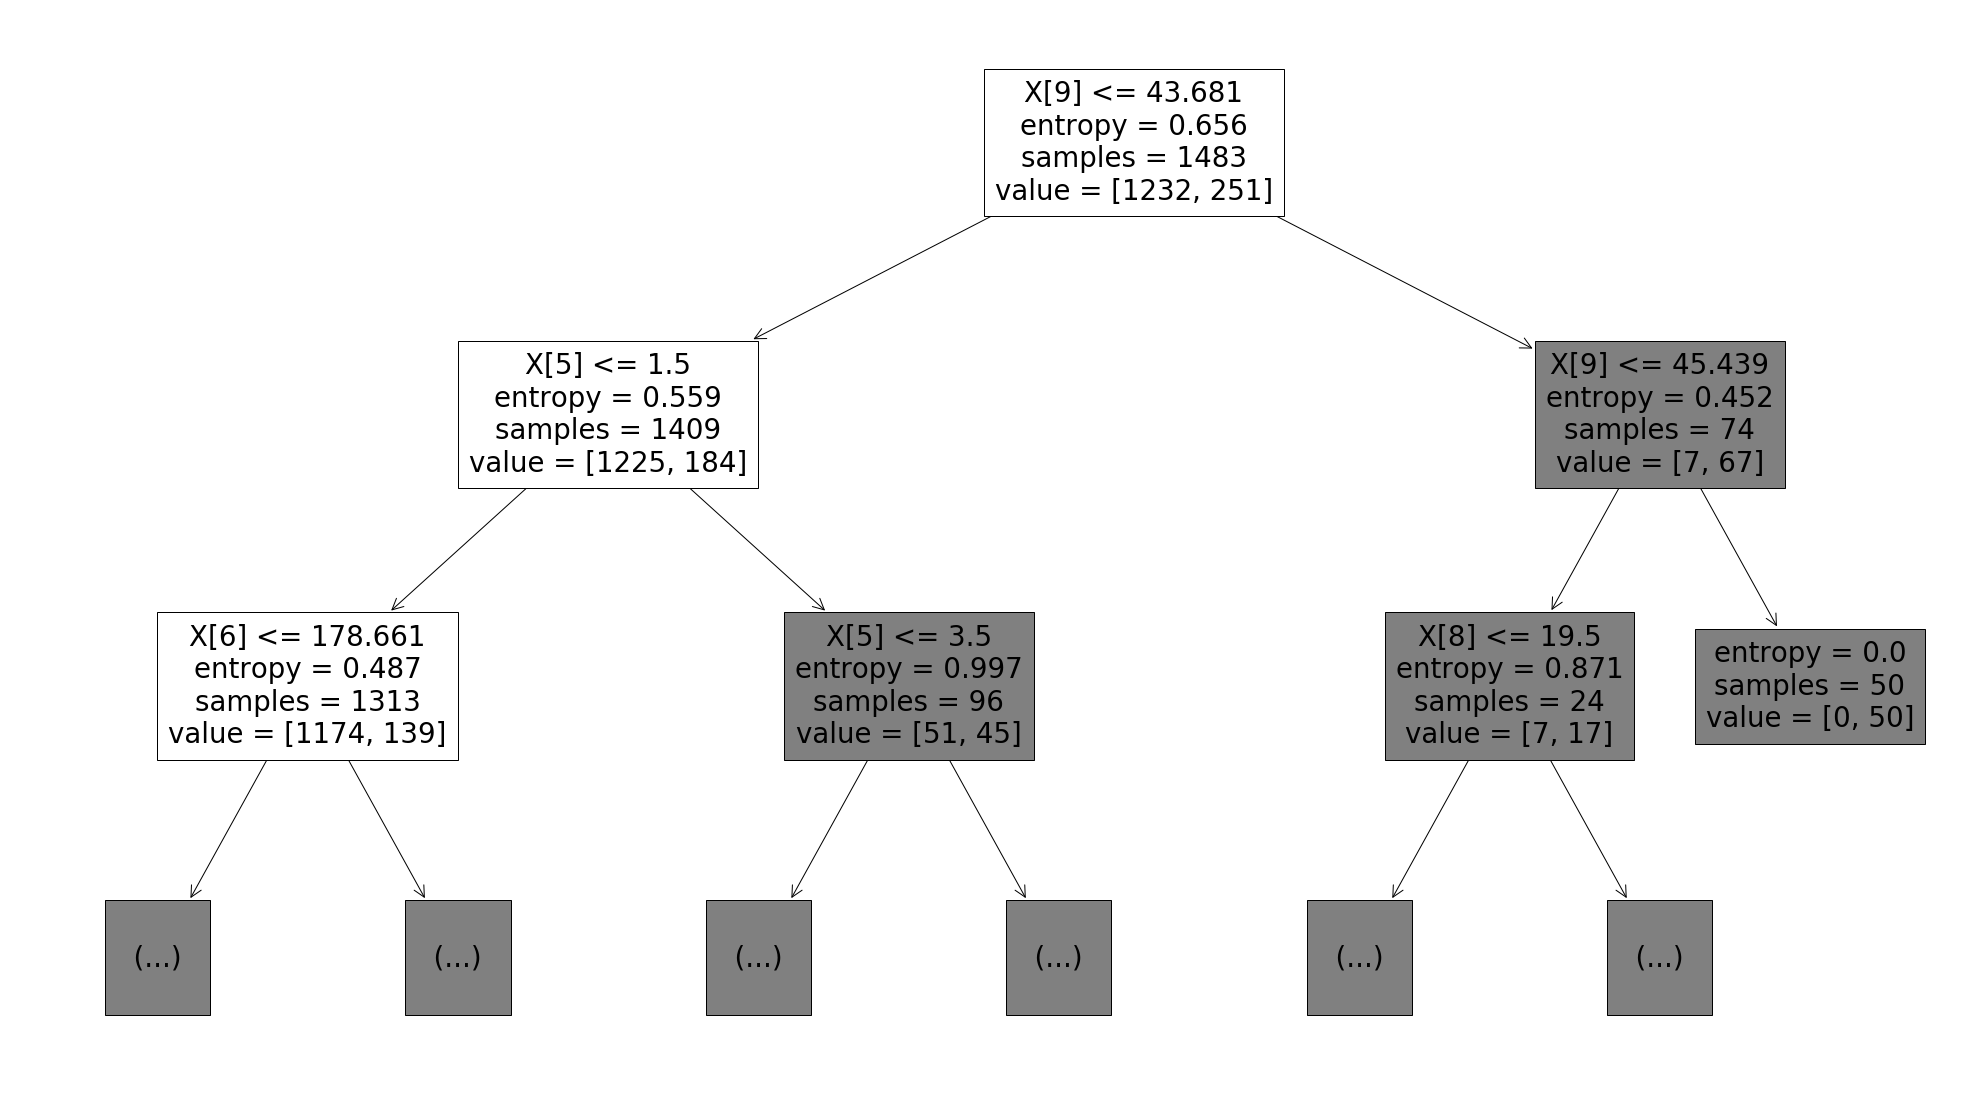

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(35,20))

plot_tree(best_model, max_depth=2);
